In [1]:
import numpy as np
import torch
import random

# Fix random seeds
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

## **1. Prepare the Binary Classification Dataset:**

#### We load the breast cancer data available from the Wisconsin database. The dataset is divided into 3 parts, namely Train, Test, and Validation. The training dataset has a total of 341 data points, while the testing and validation dataset consist of 114 data points each.


In [2]:
from data.breast_data import getBreastData

train, val, test, feature_names = getBreastData()

## **2. Build and Train a Model**
#### We then load a basic Linear model with custom layer dimensions, that uses ReLU activation. In the code given below we use the two hidden layers of dimensions 100 and 40 each, and fixed input and output sizes of 30 and 2 respectively.

In [3]:
from model.linear import LinearModel

model = LinearModel(30, 2, [100, 40])
print(model)

LinearModel(
  (layers): ModuleList(
    (0): Linear(in_features=30, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=2, bias=True)
  )
)


### **Training**
#### We now train our model, we use Adam optimizer and Pytorch's cross_entropy, loss function, optionally we can also specify our device.

In [4]:
from model.training import train_model

history = train_model(
    model, train, val, "Adam", "cross_entropy", device="cpu", num_epochs=10
)

Epoch 1/10
------------------------------
Train Loss: 0.6265, Train Accuracy: 0.7038
Val Loss: 0.5313, Val Accuracy: 0.9561
Epoch 2/10
------------------------------
Train Loss: 0.4398, Train Accuracy: 0.9443
Val Loss: 0.3397, Val Accuracy: 0.9474
Epoch 3/10
------------------------------
Train Loss: 0.2494, Train Accuracy: 0.9443
Val Loss: 0.1934, Val Accuracy: 0.9474
Epoch 4/10
------------------------------
Train Loss: 0.1404, Train Accuracy: 0.9589
Val Loss: 0.1353, Val Accuracy: 0.9474
Epoch 5/10
------------------------------
Train Loss: 0.1000, Train Accuracy: 0.9736
Val Loss: 0.1067, Val Accuracy: 0.9561
Epoch 6/10
------------------------------
Train Loss: 0.0799, Train Accuracy: 0.9824
Val Loss: 0.0886, Val Accuracy: 0.9474
Epoch 7/10
------------------------------


C:\Users\Risha\Desktop\XAI\model\training.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(
C:\Users\Risha\Desktop\XAI\model\training.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(
C:\Users\Risha\Desktop\XAI\model\training.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(
C:\Users\Risha\Desktop\XAI\model\training.py

Train Loss: 0.0675, Train Accuracy: 0.9853
Val Loss: 0.0785, Val Accuracy: 0.9737
Epoch 8/10
------------------------------
Train Loss: 0.0591, Train Accuracy: 0.9883
Val Loss: 0.0724, Val Accuracy: 0.9737
Epoch 9/10
------------------------------
Train Loss: 0.0526, Train Accuracy: 0.9883
Val Loss: 0.0686, Val Accuracy: 0.9825
Epoch 10/10
------------------------------
Train Loss: 0.0475, Train Accuracy: 0.9912
Val Loss: 0.0659, Val Accuracy: 0.9825


C:\Users\Risha\Desktop\XAI\model\training.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(
C:\Users\Risha\Desktop\XAI\model\training.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(
C:\Users\Risha\Desktop\XAI\model\training.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs, labels = torch.tensor(inputs).to(device), torch.tensor(
C:\Users\Risha\Desktop\XAI\model\training.py:64: UserW

### **Train Stats**
#### The model returns history, which is a dictionary, where we have stored the values for train_loss, val_loss, train_acc train_f1, and val_f1. All of these are List objects and have values stored across each epoch.

In [5]:
print(history.keys())

dict_keys(['train_loss', 'val_loss', 'train_acc', 'val_acc', 'train_f1', 'val_f1'])


### **Model Evaluation**
#### We now try to visualize these metrics, by plotting them on a graph, the x-axis representing the epochs, while the y-axis representing the metric. Plot_accuracy takes the history dictionary and plots the train and validation accuracy.

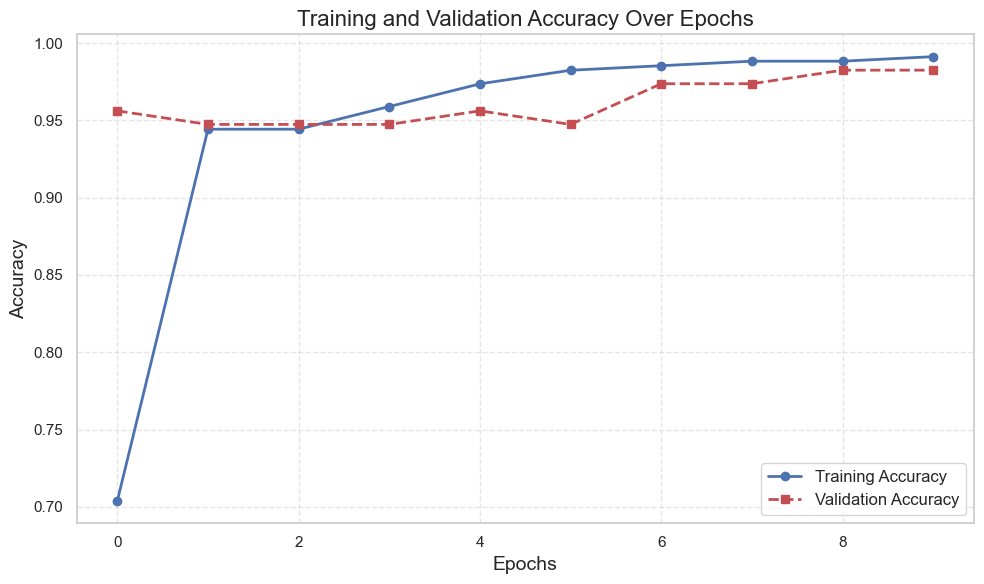

In [6]:
from visualisation.metrics import plot_accuracy

plot_accuracy(history)

**The function `plot_f1_scores` plots the training as well as validation F1 score**

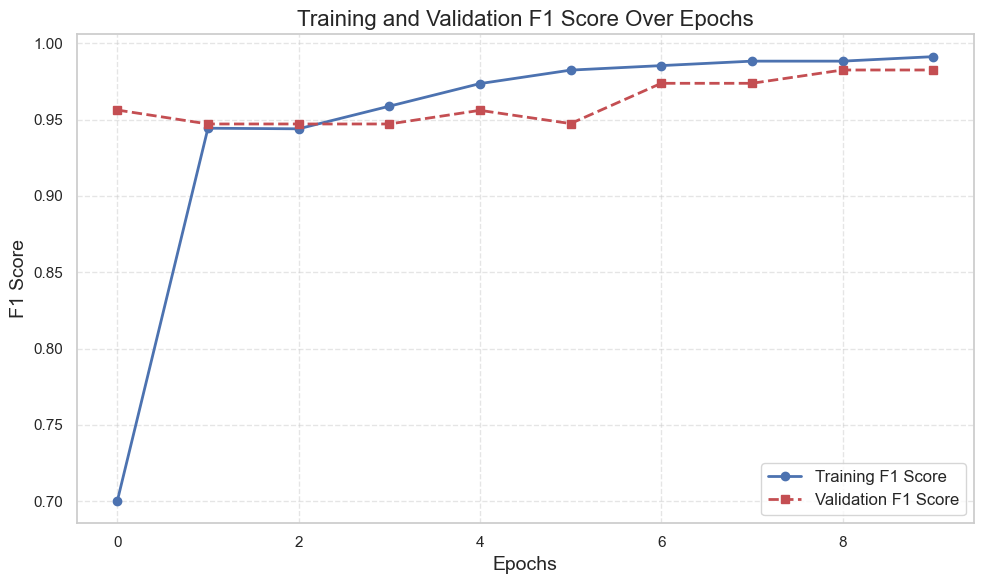

In [7]:
from visualisation.metrics import plot_f1_scores

plot_f1_scores(history)

**The `plot_roc_auc` function takes in input the trained model, and the `X` and `Y` tensors of the test data.**

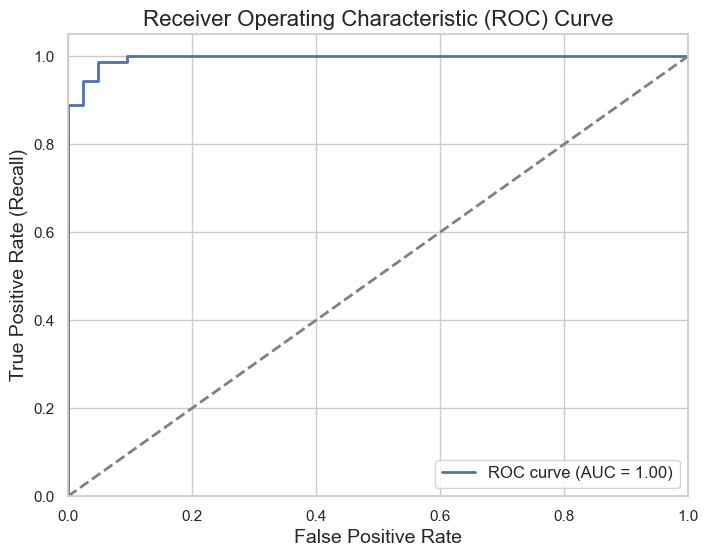

0.9953703703703703

In [8]:
from visualisation.metrics import plot_roc_auc

plot_roc_auc(model, test[0], test[1], device="cpu")

# **3. Generate Explanations Using LIME**

#### Lime Analysis starts. From here onwards, we start using the Captum library to gain insights into our model.

**Separating training as well as true labels.**

In [9]:
test_data, true_labels = test

In [10]:
# Testing model accuracy on our test dataset
# Get model predictions
import torch

predicted_probs = model(test_data).detach()
predicted_labels = torch.argmax(predicted_probs, dim=1)
accuracy = (predicted_labels == test[1]).float().mean().item() * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 94.74%


**Below we sample few data points to perform our analysis on, we take only 4 points, each of different type, FP,TP,FN,TN**

In [11]:
from lime_analysis.utils import get_subset_samples
from lime_analysis.lime_explanations import initialize_lime, generate_explanations

# Get subset of samples, currently four: (FP, TP, FN, TN)
selected_indices = get_subset_samples(test_data, true_labels, model)




*Selected indices is simple a dictionary, which maps the type of sample(FP,TP,TN,TP) to the index of the test dataset.*




In [12]:
selected_indices

{'FP': [35], 'TP': [1], 'FN': [3], 'TN': [0]}

**We need to initialize Lime, which creates an instance of the Lime model, taking as input our trained model**

In [13]:
# Initialize LIME
lime = initialize_lime(model)

### Generate Explanations

The **Generate Explanations** function takes the following inputs:
- The **LIME** instance of the model
- The **test data**
- The **true labels**
- The **indices of the data points** for analysis

It returns, for each of the selected analysis data points:
1. **Feature importance** (scaled using absolute max scaling)
2. **Time** taken to generate the explanation for each data point

***Note***: The code provided below is just an example to show how the process looks. In practice, we will call this function separately for each data point to generate and plot their individual explanation curves.


In [14]:
explanations, time = generate_explanations(
    lime,
    test_data,
    true_labels,
    selected_indices,
)
explanations

{'FP': {'indices': [35],
  'attributions': array([-0.30653733,  0.1888637 , -0.16439372, -0.2598358 ,  0.02529837,
          0.02566566,  0.00733746,  0.00716307,  0.        , -0.13161172,
         -0.12304433, -0.04471013, -0.16131419, -0.21940085, -0.10842963,
          0.        ,  0.        ,  0.        ,  0.03269542,  0.03175988,
         -0.33602503,  0.696193  , -0.24730068, -0.28625202,  1.        ,
          0.        ,  0.19579929,  0.10451464,  0.01343503,  0.01924082],
        dtype=float32)},
 'TP': {'indices': [1],
  'attributions': array([ 0.4181772 ,  0.49016   ,  0.51575243,  0.69105613,  0.18088527,
          0.22327822,  0.16340859,  0.3682627 ,  0.        , -0.09642348,
          0.32380491,  0.        ,  0.70837444,  0.22784178,  0.02197597,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.97379786,  0.44836938,  0.6697852 ,  0.27130646,  0.49203685,
          0.55259   ,  0.86903   ,  1.        ,  0.37820667,  0.22774287],
    

In [15]:
AUPC_dict = {} # a dictionary to store the Area Under the Perturbation Curve, so as to compare later

# **Visualizing Feature Importance**

Now that we have seen what the explanations (a.k.a attributions) look like, we will visualize how each feature's importance appears on a plot.

The various analyses and plots/visualizations for each sample is separately covered.

***NOTE: Originally, I wrote a loop to generate all the plots for each sample automatically, but I realized there were too many plots to handle for a single instance. As a result, I decided to split the process and generate separate plots for each class type for your better readability and understanding.***


### Analyses Covered:

1. **Feature Importance Plot**: 
   - Displays the hierarchy of features based on their importance.

2. **Time Taken to Generate the Explanations**: 
   - Shows the time it took to generate explanations for each feature.

3. **Perturbation Steps and Prediction Flips**: 
   - Tracks how the model's prediction changes as the most important features are perturbed.

4. **Perturbation Curve**: 
   - A plot that shows the relationship between the number of perturbed features and the model’s performance (accuracy).

5. **Area Under Perturbation Curve (AUPC)**: 
   - Computes the area under the perturbation curve to evaluate how much the model’s performance degrades as the most important features are perturbed.


<h1><b>1. Analysis for True Positive (TP)</b></h3>


## **Feature Importance Plot and Time Taken**


The `plot_feature_importance` function takes the following inputs:
- **Explanations/Attributions**: The calculated importance of each feature.
- **Feature Names**: The names of the features.
- **Key Name**: The class type of the sample (e.g., TP, FP, TN, FN).

The function uses these inputs to plot a `sns.barplot`, which displays the features in **decreasing order of impact**. Additionally, it also shows the **time taken** to generate the explanations for each feature, allowing us to easily identify which features have the most significant impact.


LIME Explanation for TP, time taken : 0.0405268669128418 



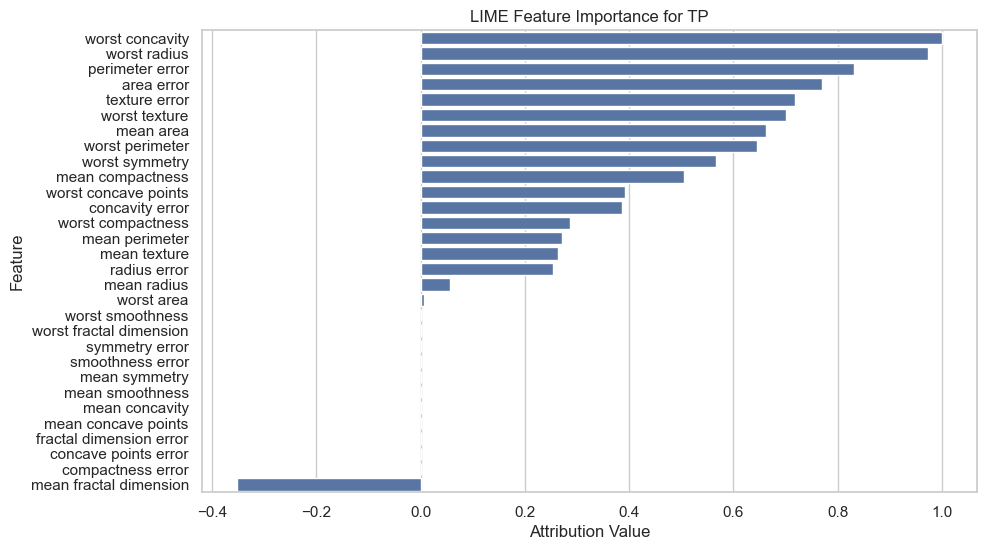

In [16]:
from visualisation.lime import plot_feature_importance


explanations, time = generate_explanations(
    lime, test_data, true_labels, {"TP": selected_indices.get("TP")}
)
print(f"LIME Explanation for TP, time taken : {time} \n")
plot_feature_importance(explanations["TP"]["attributions"], feature_names, "TP")

## **Parsimony**

Parsimony tells us how many features for a given threshold value

In [17]:
from lime_analysis.lime_explanations import parsimony

print(
    f"The parsimony for this instance for a threshold of 0.4 is {parsimony(explanations['TP']['attributions'], threshold=0.1)}"
)

The parsimony for this instance for a threshold of 0.4 is 17


## **Perturbation Steps and Prediction Flips**

### Perturbation Process Overview

We start with a `TP` class data point and apply perturbations to it. The `perturb_single_instance` function is responsible for this process, taking the following inputs:

- **Data Point (Index)**: The index of the data point.
- **Explanations**: Explanations generated for the data point.
- **Trained Model**: The machine learning model.
- **Dataset**: The dataset containing all data points.
- **Feature Names**: The feature names in the dataset.

#### Perturbation Procedure

1. **Perturb Features**: The function perturbs the features of the selected data point one by one. Each feature is replaced by its mean value from the entire dataset.
   
2. **Track Prediction**: After each perturbation, the model’s prediction is tracked. This continues sequentially, from:
   - One feature perturbed,
   - Two features perturbed, and so on,
   - Until all features are perturbed.

#### Output and Visualization

The function returns the step at which the model’s prediction flips. 

Using this data, the `plot_perturbation_steps` function creates a plot, illustrating how many perturbations occurred before the model’s prediction changed.


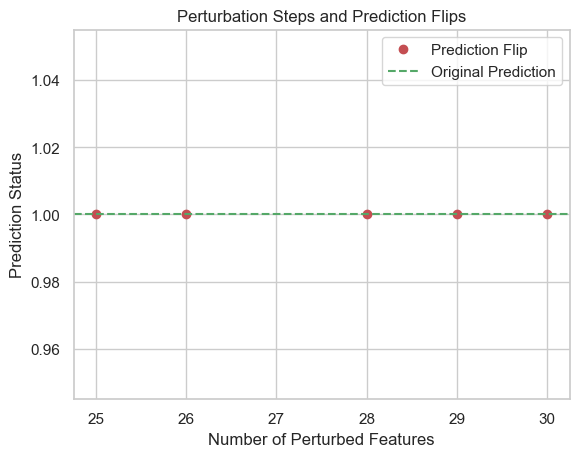

In [18]:
from visualisation.lime import plot_perturbation_steps
from lime_analysis.perturbation import calculate_feature_means, perturb_single_instance

results = perturb_single_instance(
    {"TP": [1]}, explanations["TP"]["attributions"], model, test_data, feature_names
)
plot_perturbation_steps(results)

## **Perturbation Curve for the Entire Dataset**

Next, we focus on the **perturbation curve** for the entire dataset. Using the explanations from the `TP` class data point, we perturb the features of the entire test dataset and observe how the model's accuracy is affected.

#### `perturb_dataset` Function

This function takes the following inputs:
- **Dataset**: The test dataset to be evaluated.
- **Explanations**: The feature importance scores for the `TP` data point.
- **Trained Model**: The pre-trained machine learning model.
- **Feature Names**: The names of the features in the dataset.

The function proceeds by:
1. **Perturbing Features**: Each feature in the dataset is altered one at a time, similar to the single-instance perturbation process.
2. **Tracking Accuracy**: After each perturbation, the model's accuracy is recorded.

The function then returns the accuracy values after each perturbation.

After using the output of the `perturb_dataset` function, the following functions do further evaluation

- The `plot_perturbation_curve` function generates a **Perturbation Curve** plot, which shows how the model’s accuracy declines as more features are perturbed.
- The `compute_aupc` function calculates the **Area Under the Perturbation Curve (AUPC)**, providing a numerical measure of the effectiveness of the feature importance explanations.

This process allows us to quantitatively assess how well the explanations reflect the importance of features in the model's decision-making.


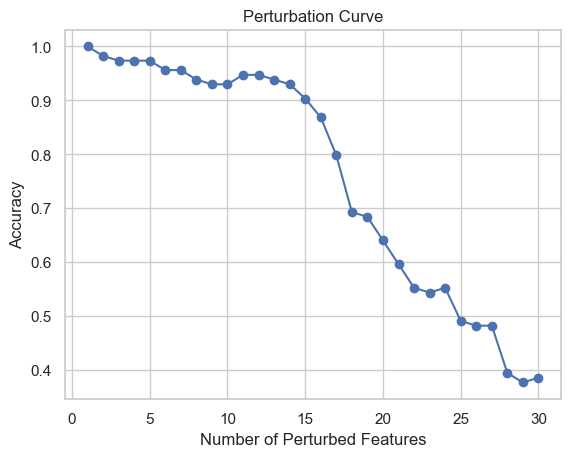

AUPC :22.131578996777534


In [19]:
from visualisation.lime import plot_perturbation_curve
from lime_analysis.perturbation import perturb_dataset, compute_aupc

accuracy_results = perturb_dataset(
    test_data, explanations["TP"]["attributions"], model, feature_names
)
plot_perturbation_curve(accuracy_results)
print(f"AUPC :{compute_aupc(accuracy_results)}")
AUPC_dict['TP'] = compute_aupc(accuracy_results)

<h1><b>2. Analysis for True Negative (TN)</b></h3>


## **Feature Importance Plot and Time Taken**


LIME Explanation for TN, time taken : 0.024503469467163086 



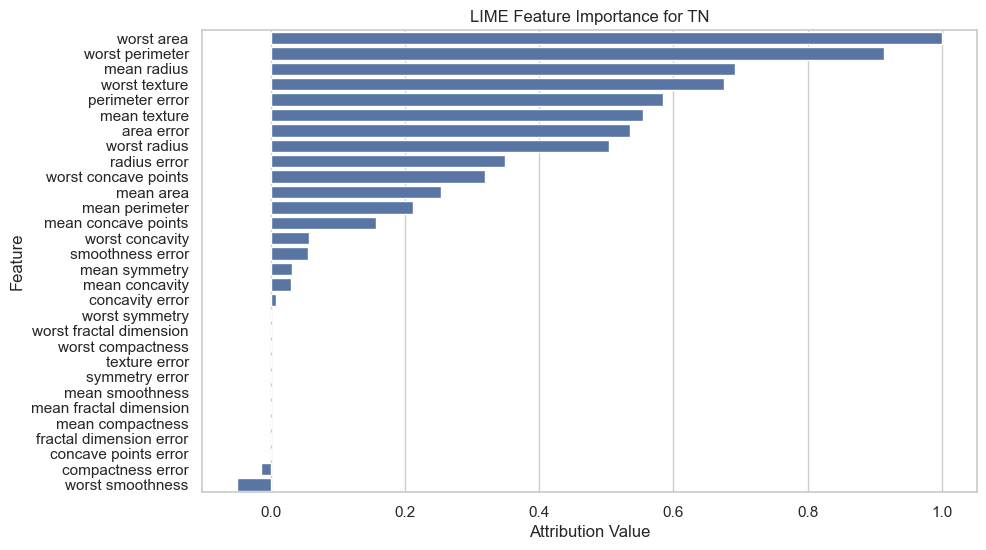

In [20]:
from visualisation.lime import plot_feature_importance


explanations, time = generate_explanations(
    lime, test_data, true_labels, {"TN": selected_indices.get("TN")}
)
print(f"LIME Explanation for TN, time taken : {time} \n")
plot_feature_importance(explanations["TN"]["attributions"], feature_names, "TN")

## **Parsimony**

Parsimony tells us how many features for a given threshold value

In [21]:
from lime_analysis.lime_explanations import parsimony

print(
    f"The parsimony for this instance for a threshold of 0.4 is {parsimony(explanations['TN']['attributions'], threshold=0.1)}"
)

The parsimony for this instance for a threshold of 0.4 is 13


## **Perturbation Steps and Prediction Flips**

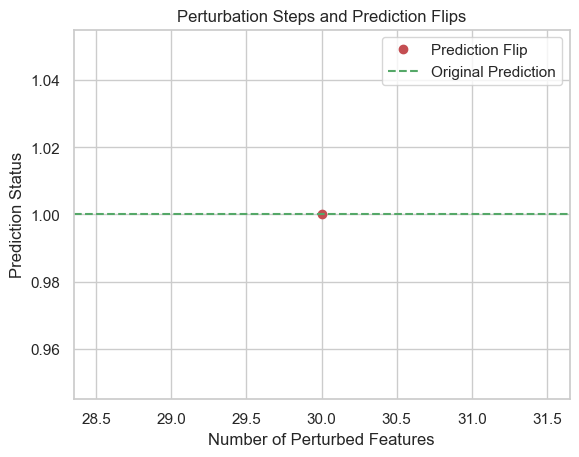

In [22]:
from visualisation.lime import plot_perturbation_steps
from lime_analysis.perturbation import calculate_feature_means, perturb_single_instance

results = perturb_single_instance(
    {"TN": [1]}, explanations["TN"]["attributions"], model, test_data, feature_names
)
plot_perturbation_steps(results)

## **Perturbation Curve for the Entire Dataset**

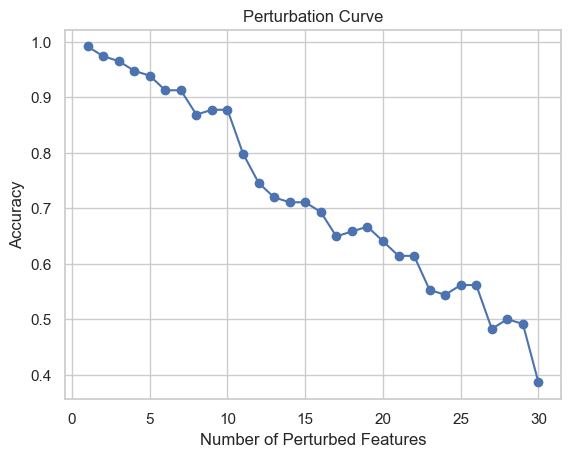

AUPC :20.872806921601295


In [23]:
from visualisation.lime import plot_perturbation_curve
from lime_analysis.perturbation import perturb_dataset, compute_aupc

accuracy_results = perturb_dataset(
    test_data, explanations["TN"]["attributions"], model, feature_names
)
plot_perturbation_curve(accuracy_results)
print(f"AUPC :{compute_aupc(accuracy_results)}")
AUPC_dict['TN'] = compute_aupc(accuracy_results)


<h1 ><b>3. Analysis for False Positive (FP)</b></h3>


## **Feature Importance Plot and Time Taken**


LIME Explanation for FP, time taken : 0.03307676315307617 



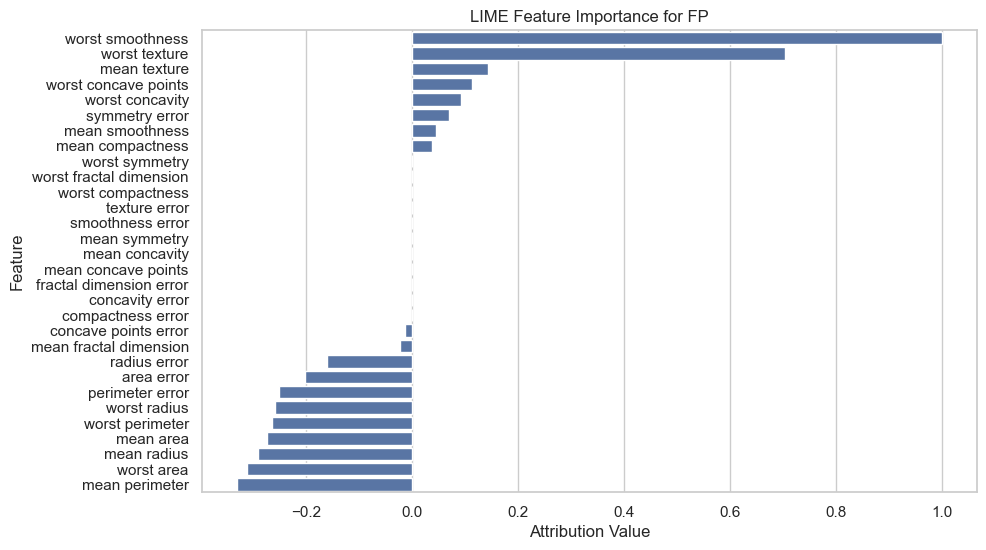

In [24]:
from visualisation.lime import plot_feature_importance


explanations, time = generate_explanations(
    lime, test_data, true_labels, {"FP": selected_indices.get("FP")}
)
print(f"LIME Explanation for FP, time taken : {time} \n")
plot_feature_importance(explanations["FP"]["attributions"], feature_names, "FP")

## **Parsimony**

Parsimony tells us how many features for a given threshold value

In [25]:
from lime_analysis.lime_explanations import parsimony

print(
    f"The parsimony for this instance for a threshold of 0.4 is {parsimony(explanations['FP']['attributions'], threshold=0.1)}"
)

The parsimony for this instance for a threshold of 0.4 is 13


## **Perturbation Steps and Prediction Flips**

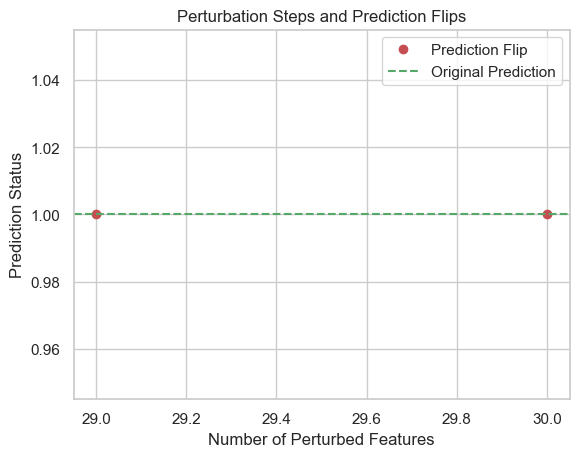

In [26]:
from visualisation.lime import plot_perturbation_steps
from lime_analysis.perturbation import calculate_feature_means, perturb_single_instance

results = perturb_single_instance(
    {"FP": [1]}, explanations["FP"]["attributions"], model, test_data, feature_names
)
plot_perturbation_steps(results)

## **Perturbation Curve for the Entire Dataset**

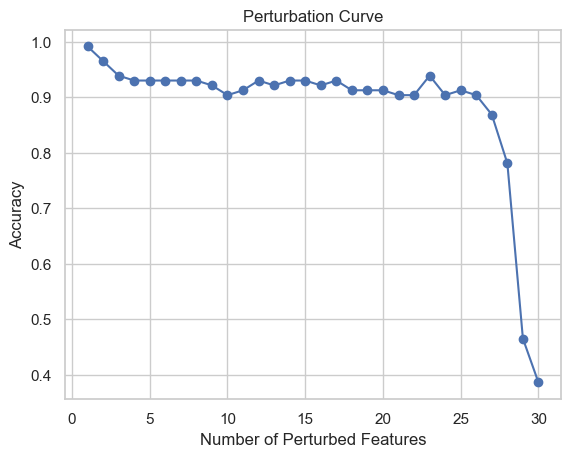

AUPC :25.855263397097588


In [27]:
from visualisation.lime import plot_perturbation_curve
from lime_analysis.perturbation import perturb_dataset, compute_aupc

accuracy_results = perturb_dataset(
    test_data, explanations["FP"]["attributions"], model, feature_names
)
plot_perturbation_curve(accuracy_results)
print(f"AUPC :{compute_aupc(accuracy_results)}")
AUPC_dict['FP'] = compute_aupc(accuracy_results)


<h1 ><b>4. Analysis for False Negative (FN)</b></h3>


## **Feature Importance Plot and Time Taken**


LIME Explanation for FN, time taken : 0.025988101959228516 



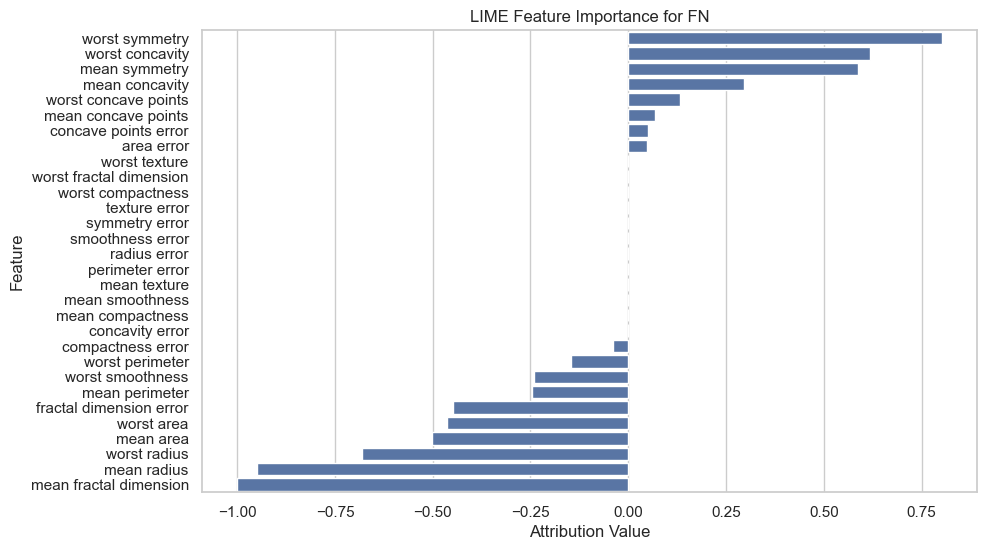

In [28]:
from visualisation.lime import plot_feature_importance


explanations, time = generate_explanations(
    lime, test_data, true_labels, {"FN": selected_indices.get("FN")}
)
print(f"LIME Explanation for FN, time taken : {time} \n")
plot_feature_importance(explanations["FN"]["attributions"], feature_names, "FN")

## **Parsimony**

Parsimony tells us how many features for a given threshold value

In [29]:
from lime_analysis.lime_explanations import parsimony

print(
    f"The parsimony for this instance for a threshold of 0.4 is {parsimony(explanations['FN']['attributions'], threshold=0.1)}"
)

The parsimony for this instance for a threshold of 0.4 is 14


## **Perturbation Steps and Prediction Flips**

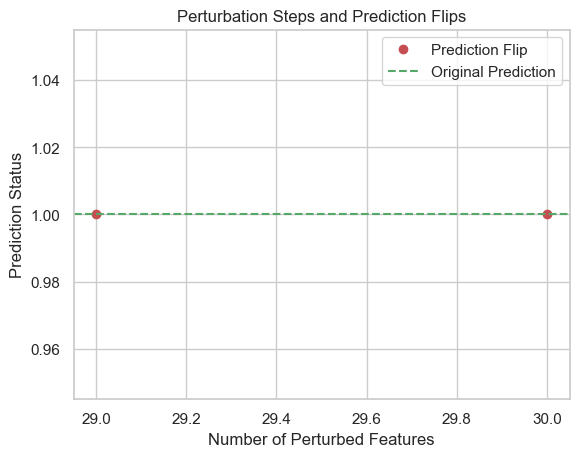

In [30]:
from visualisation.lime import plot_perturbation_steps
from lime_analysis.perturbation import calculate_feature_means, perturb_single_instance

results = perturb_single_instance(
    {"FN": [1]}, explanations["FN"]["attributions"], model, test_data, feature_names
)
plot_perturbation_steps(results)

## **Perturbation Curve for the Entire Dataset**

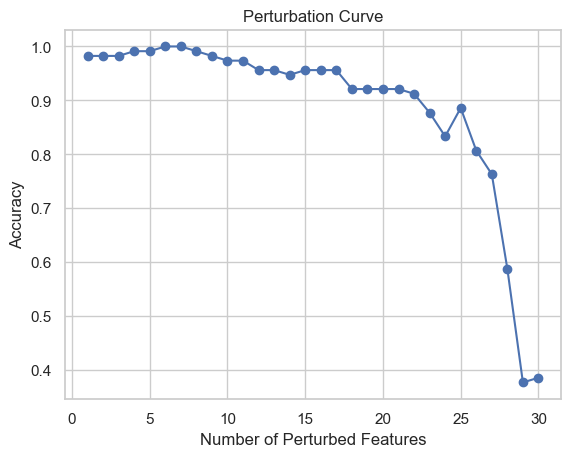

AUPC :26.0087718218565


In [31]:
from visualisation.lime import plot_perturbation_curve
from lime_analysis.perturbation import perturb_dataset, compute_aupc

accuracy_results = perturb_dataset(
    test_data, explanations["FN"]["attributions"], model, feature_names
)
plot_perturbation_curve(accuracy_results)
print(f"AUPC :{compute_aupc(accuracy_results)}")
AUPC_dict['FN'] = compute_aupc(accuracy_results)

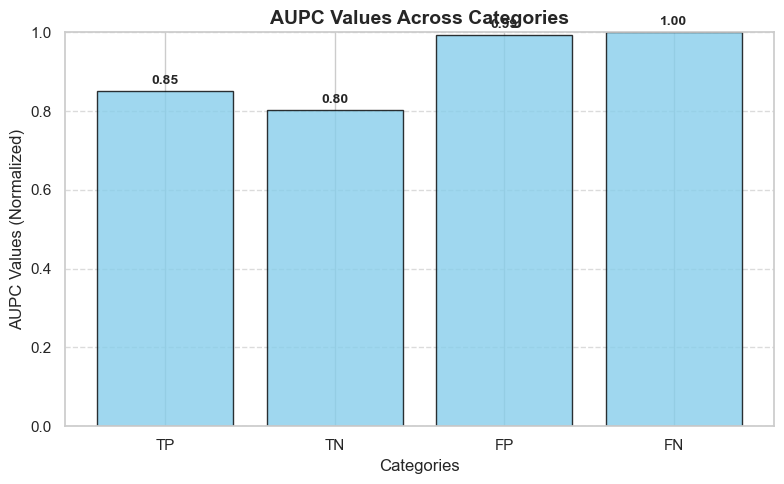

In [34]:
from visualisation.lime import visualize_aupc

visualize_aupc(
        aupc_dict= AUPC_dict,
       normalize = True
)